**UNIVERSIDADE DE SÃO PAULO (USP)**

**_Author_**: Carlos Filipe de Castro Lemos

**_Academy Study_**: Exploring Categoric Data


# Packages

In [43]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Loading Categoric Data

Dataset: https://archive.ics.uci.edu/dataset/2/adult

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

In [44]:
path = "./data/adult.data"
df = pd.read_csv(path)

# Exploring Categoric Data

## Preliminary Information

 Checking data shape

In [45]:
df.shape

(32560, 15)

Checking data information, as dtypes, range index, memory, columns and others.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Getting the name of the columns

In [47]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

Putting categorical data into a variable

In [48]:
categorical = [' State-gov', ' Bachelors', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male',
       ' United-States', ' <=50K']

Checking for duplicates

In [49]:
df.duplicated().sum()

24

Checking for null values

In [50]:
df.isnull().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

Looking at the head of the categorical data

In [51]:
df[categorical].head(5)

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


Looking at the tail of the categorical data

In [52]:
df[categorical].tail(5)

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K
32559,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,>50K


Looking at the unique values of the categoric data

In [53]:
for c in categorical:
    print("* ", c, ":", np.unique(df[c], return_counts=True), "\n")

*   State-gov : (array([' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype=object), array([ 1836,   960,  2093,     7, 22696,  1116,  2541,  1297,    14])) 

*   Bachelors : (array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object), array([  933,  1175,   433,   168,   333,   646,   514,  1067,  1382,
        5354,   413, 10501,  1723,    51,   576,  7291])) 

*   Never-married : (array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object), array([ 4443,    23, 14976,   418, 10682,  1025,   993])) 

*   Adm-clerical : (array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-manage

When we have few unique values, it is better to make a countplot to see the data.
However, when there are many unique values, we must use another methods.

Some of the data variable

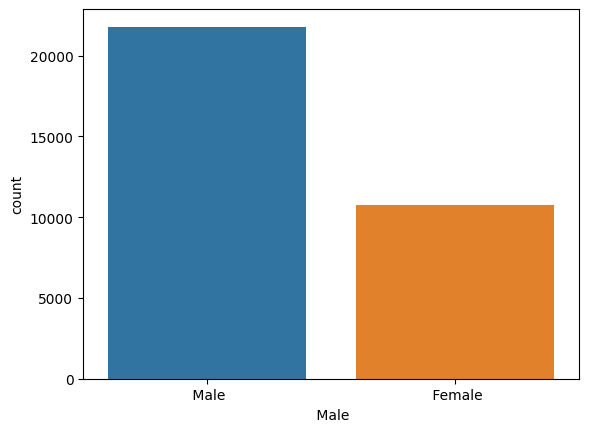

In [54]:
sns.countplot(x = df[' Male']);

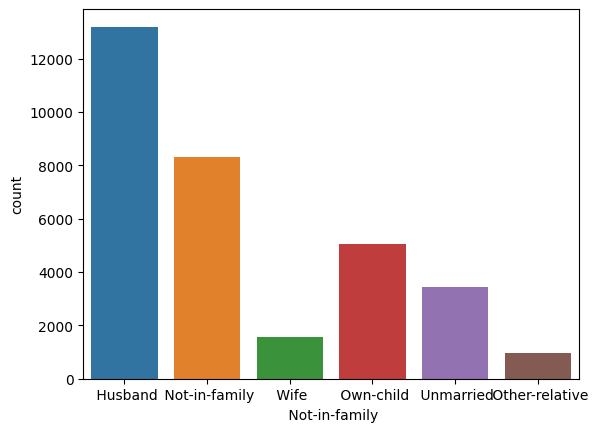

In [55]:
sns.countplot(x = df[' Not-in-family']);


In some cases, we would like to explore the data hierarchy. Bellow, for example, we can see the area statistics of how kindship relationship are distributed according to the person's job class (we can click in some of then).

In [56]:
chart = px.treemap(df, path=[' State-gov', ' Not-in-family'])
chart.show()

In other cases, we would like to see the correlation of variables with the target. To do this, we can correlate the level of study with the person's income.

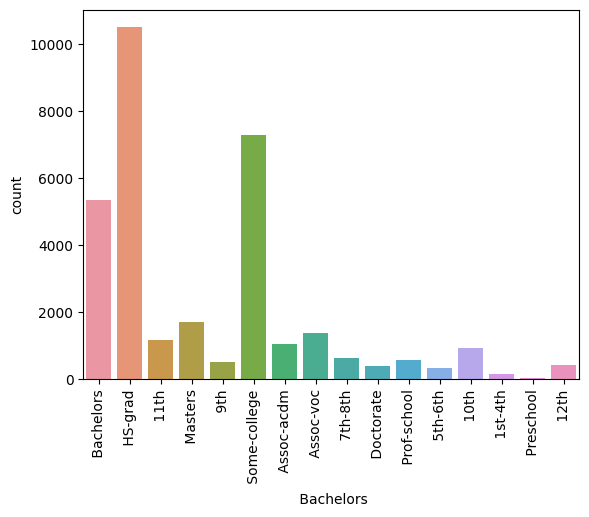

In [57]:
sns.countplot(x = df[' Bachelors']);
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel=' <=50K', ylabel='count'>

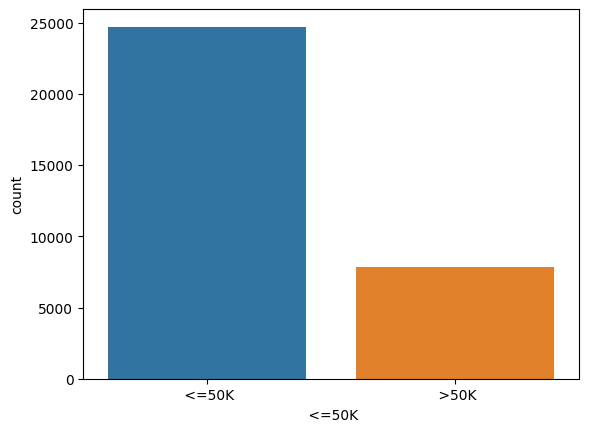

In [58]:
sns.countplot(x = df[' <=50K'])

In [59]:
chart = px.parallel_categories(df, dimensions=[' Bachelors', ' <=50K'])
chart.show()